In [1]:
#importaciones
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

import matplotlib.dates as mdates

# regresion lineal

In [2]:
#ensayo
reg = linear_model.LinearRegression()

reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) 
reg.coef_ 
reg.intercept_
reg.predict([[3, 3]])



array([3.])

In [13]:
#
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
#importa dataframe
df = pd.read_csv('Baloto.csv')
df.columns = ['fecha', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6']
df.head()

,fecha,b1,b2,b3,b4,b5,b6
0,30.09.2023,10,15,19,21,41,10
1,27.09.2023,2,20,25,36,41,11
2,23.09.2023,13,20,24,30,42,12
3,20.09.2023,2,3,10,21,23,14
4,16.09.2023,6,29,32,39,43,16


In [21]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   2333 non-null   object
 1   b1      2333 non-null   int64 
 2   b2      2333 non-null   int64 
 3   b3      2333 non-null   int64 
 4   b4      2333 non-null   int64 
 5   b5      2333 non-null   int64 
 6   b6      2333 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 127.7+ KB


In [22]:
#nulls
df.isnull().sum()

fecha    0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
dtype: int64

In [23]:
df.dtypes

fecha    object
b1        int64
b2        int64
b3        int64
b4        int64
b5        int64
b6        int64
dtype: object

In [24]:
df['fecha']

0       30.09.2023
1       27.09.2023
2       23.09.2023
3       20.09.2023
4       16.09.2023
           ...    
2328    24.02.2001
2329    17.02.2001
2330    10.02.2001
2331    03.02.2001
2332    27.01.2001
Name: fecha, Length: 2333, dtype: object

In [28]:
# %% Convertir la columna 'Fecha' a datetime
# Asegúrate de que el formato coincida exactamente con tus fechas ('dd.mm.yyyy')
try:
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%m.%Y')
except ValueError as e:
    print(f"Error al convertir fechas: {e}")
    print("Verifica que TODAS las fechas en la columna 'Fecha' tengan el formato 'dd.mm.yyyy'.")
    # Intenta inferir el formato si el especificado falla (menos fiable)
    # df['Fecha_dt'] = pd.to_datetime(df['Fecha'], infer_datetime_format=True)

# Convertir la fecha datetime a un número ordinal para la regresión
# El número ordinal representa el número de días desde una fecha de referencia (año 1, día 1)
df['fecha'] = df['fecha'].apply(lambda date: date.toordinal())

print("\nDataFrame con fechas convertidas:")

df.info() # Verifica los tipos de datos

Error al convertir fechas: time data "738793" doesn't match format "%d.%m.%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Verifica que TODAS las fechas en la columna 'Fecha' tengan el formato 'dd.mm.yyyy'.


AttributeError: 'int' object has no attribute 'toordinal'

In [8]:
# Intentar convertir la columna 'fecha' directamente a tipo datetime, manejar posibles errores
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d", errors="coerce")


In [9]:
print(df["fecha"].isna().sum())  # Cantidad de valores no convertidos


2333


In [10]:
print(df[df["fecha"].isna()])


     fecha  b1  b2  b3  b4  b5  b6
0      NaT  10  15  19  21  41  10
1      NaT   2  20  25  36  41  11
2      NaT  13  20  24  30  42  12
3      NaT   2   3  10  21  23  14
4      NaT   6  29  32  39  43  16
...    ...  ..  ..  ..  ..  ..  ..
2328   NaT   3   6  16  22  38  44
2329   NaT  15  20  21  29  32  44
2330   NaT  11  13  27  30  32  39
2331   NaT   1   2  11  15  32  34
2332   NaT   1   2   5  20  27  33

[2333 rows x 7 columns]


In [122]:
df = df.dropna(subset=["fecha"])


In [123]:
df["dias"] = (df["fecha"] - df["fecha"].min()).dt.days


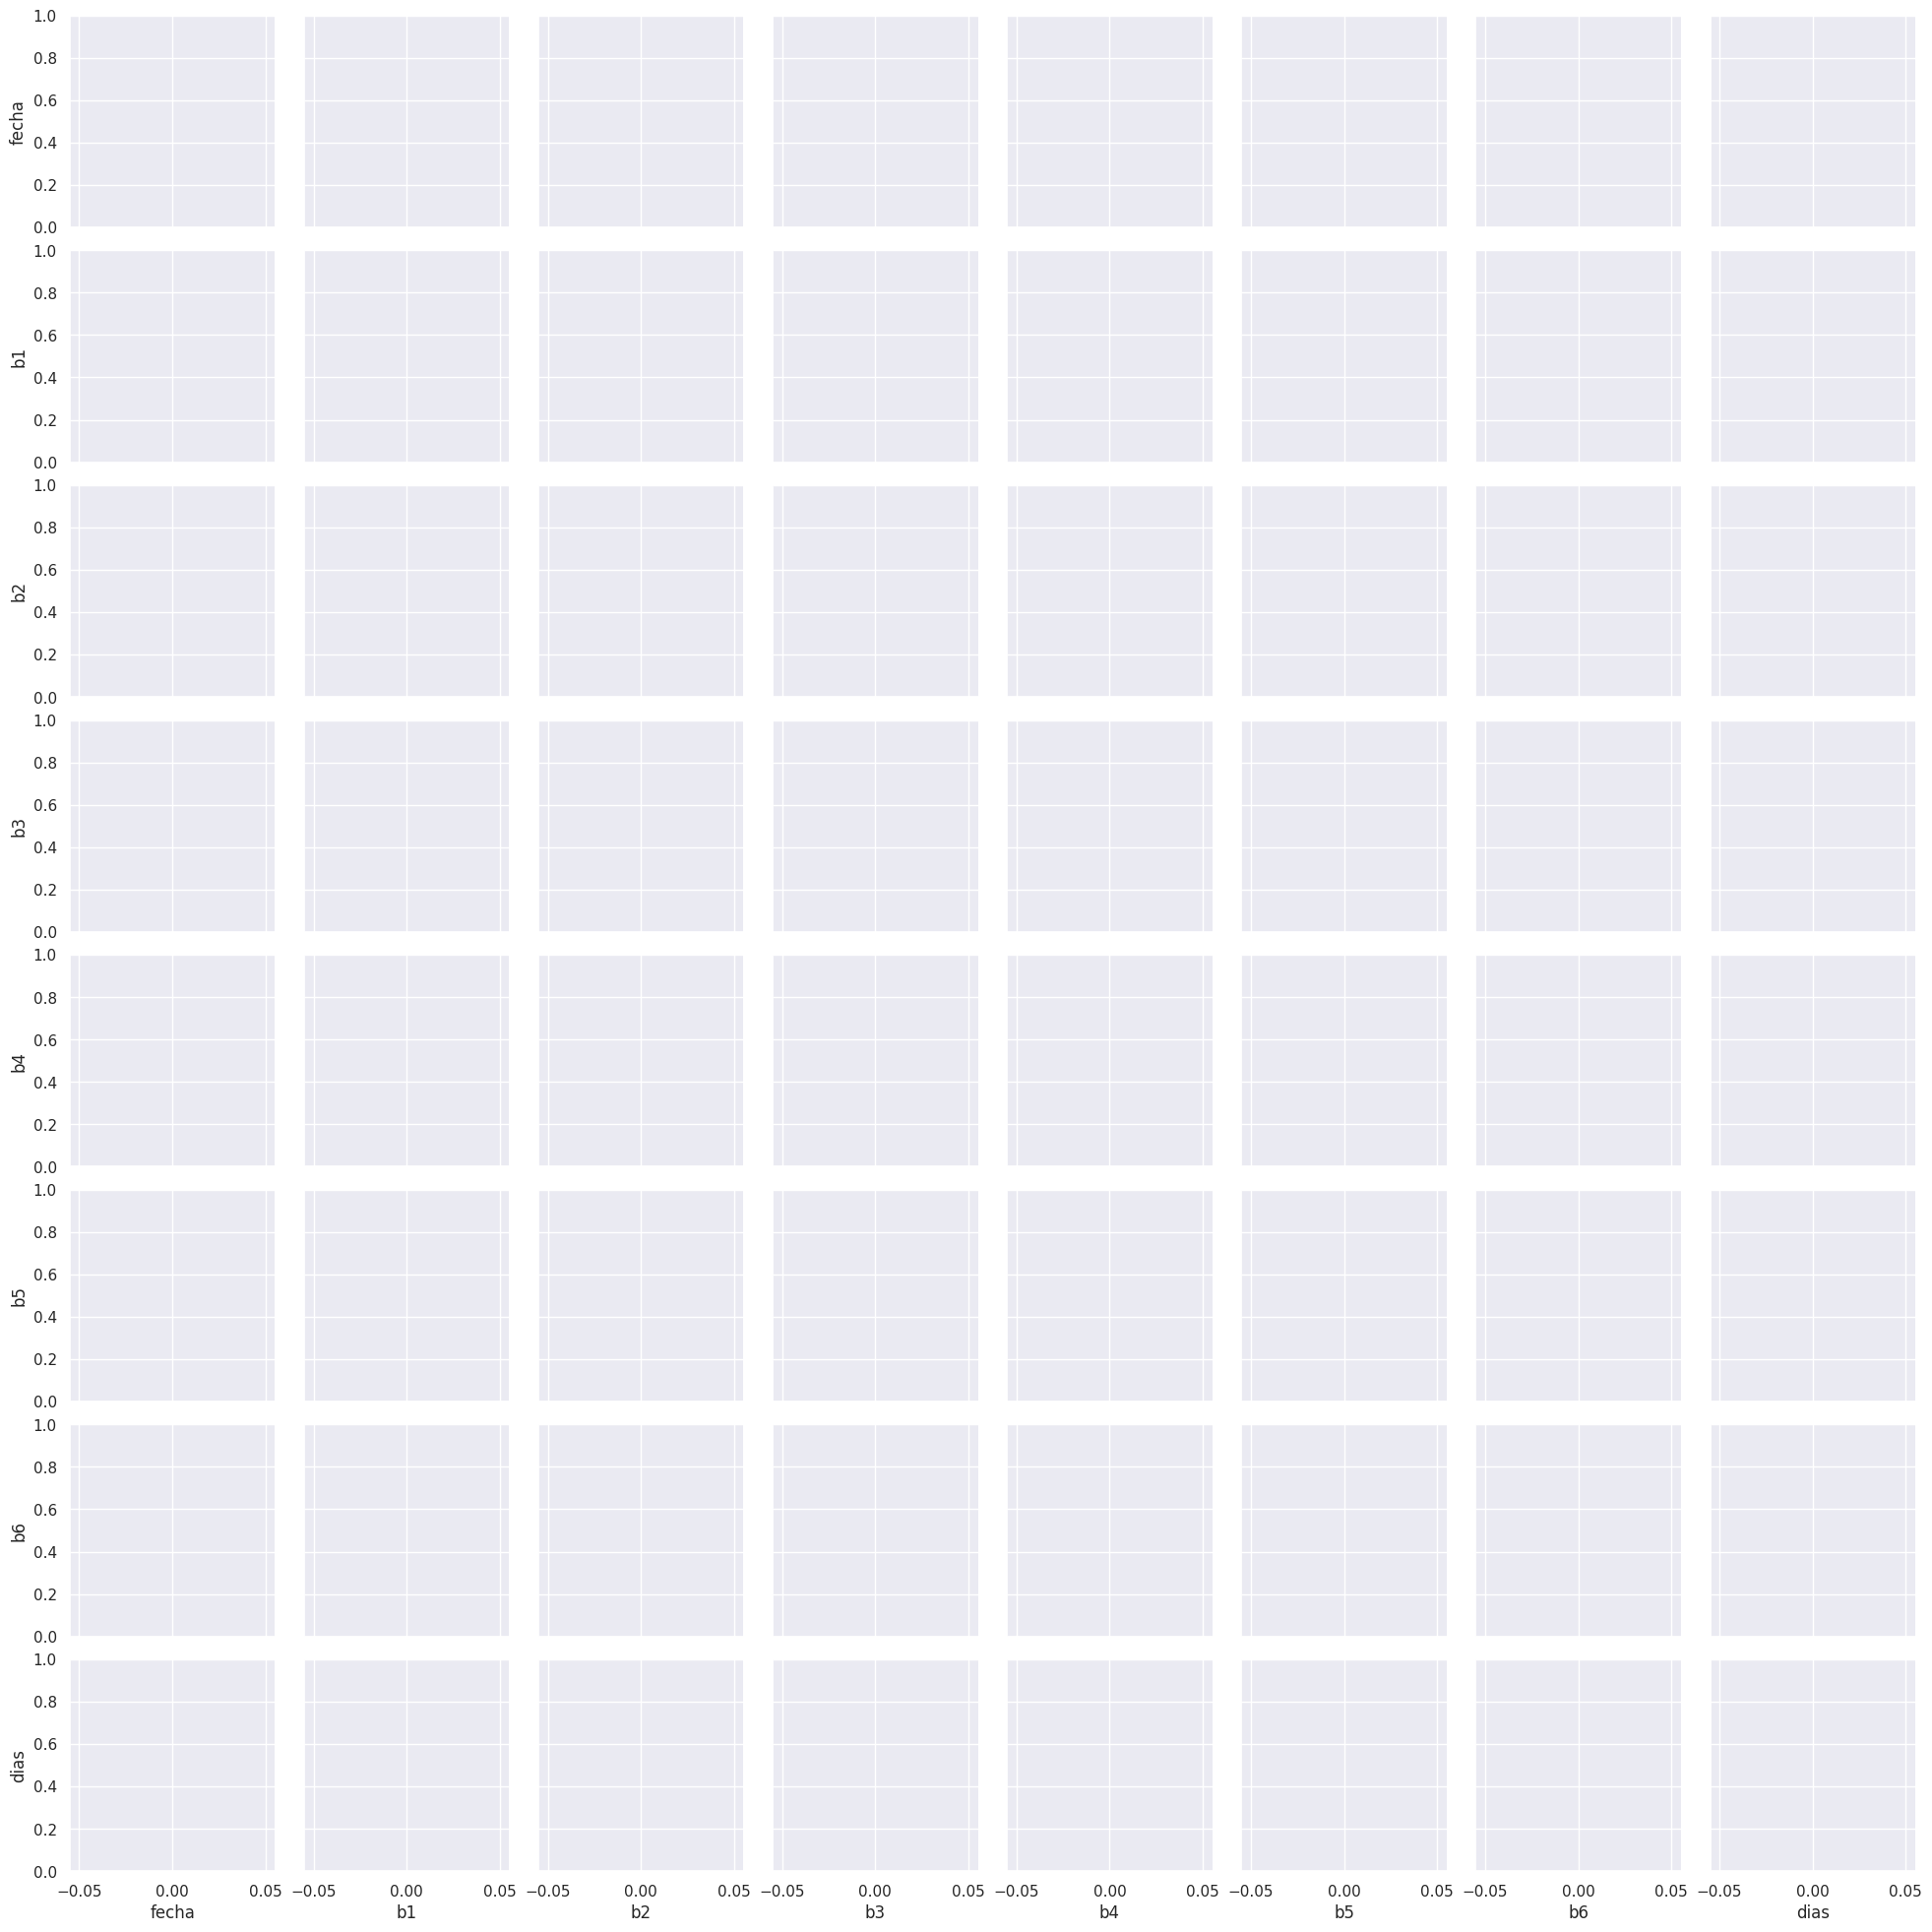

In [124]:
sns.pairplot(df) # Call pairplot from seaborn library


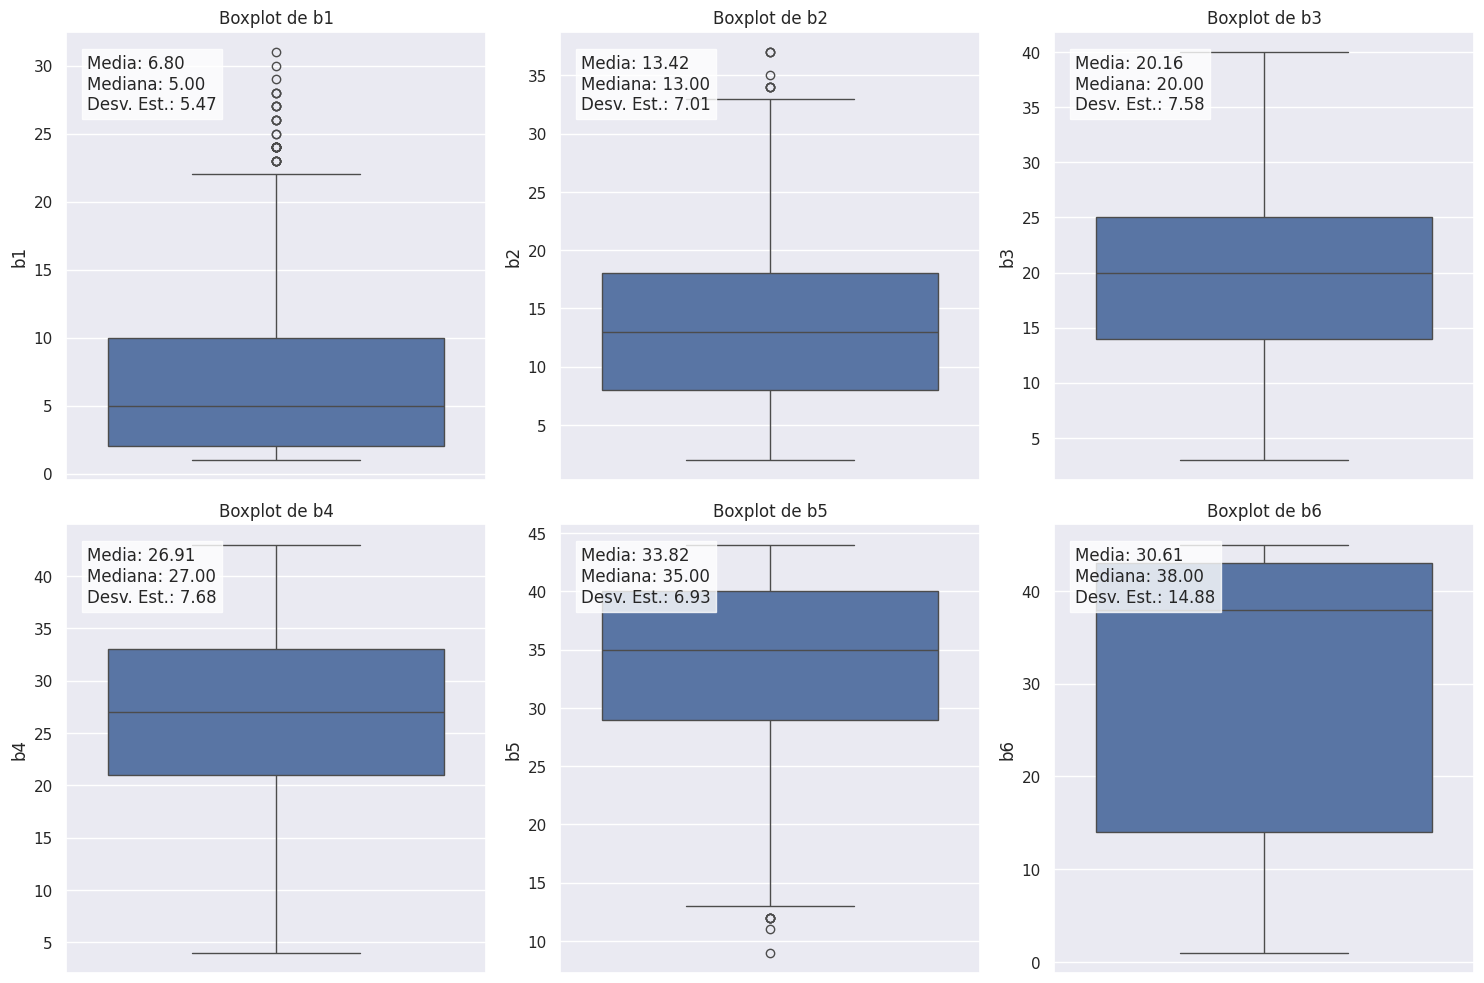

In [44]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

#from pypalettes import get_hex
sns.set_theme(style="darkgrid")
#palette = get_hex("Acadia", keep_first_n=3)

# Lista de columnas para los boxplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los boxplots
for i, columna in enumerate(columnas):
    sns.boxplot(y=df[columna], ax=axes[i])  # Cambiar a 'y' para boxplots verticales
    axes[i].set_title(f'Boxplot de {columna}')

    # Calcular y mostrar estadísticas
    stats = df[columna].describe()
    stats_str = f"Media: {stats['mean']:.2f}\nMediana: {stats['50%']:.2f}\nDesv. Est.: {stats['std']:.2f}"
    axes[i].text(0.05, 0.95, stats_str, transform=axes[i].transAxes,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

<Axes: xlabel='fecha', ylabel='b1'>

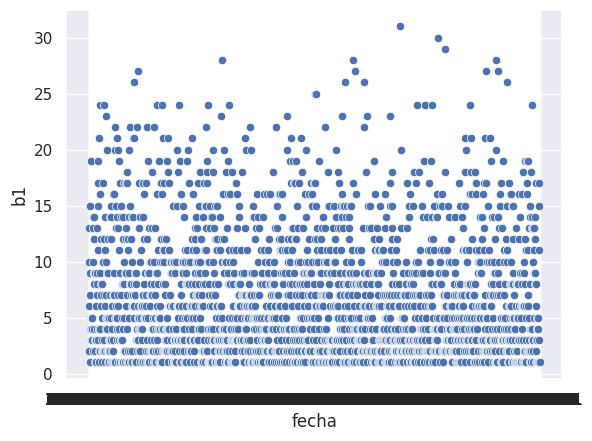

In [45]:

sns.scatterplot(x=df['fecha'], y=df['b1'])

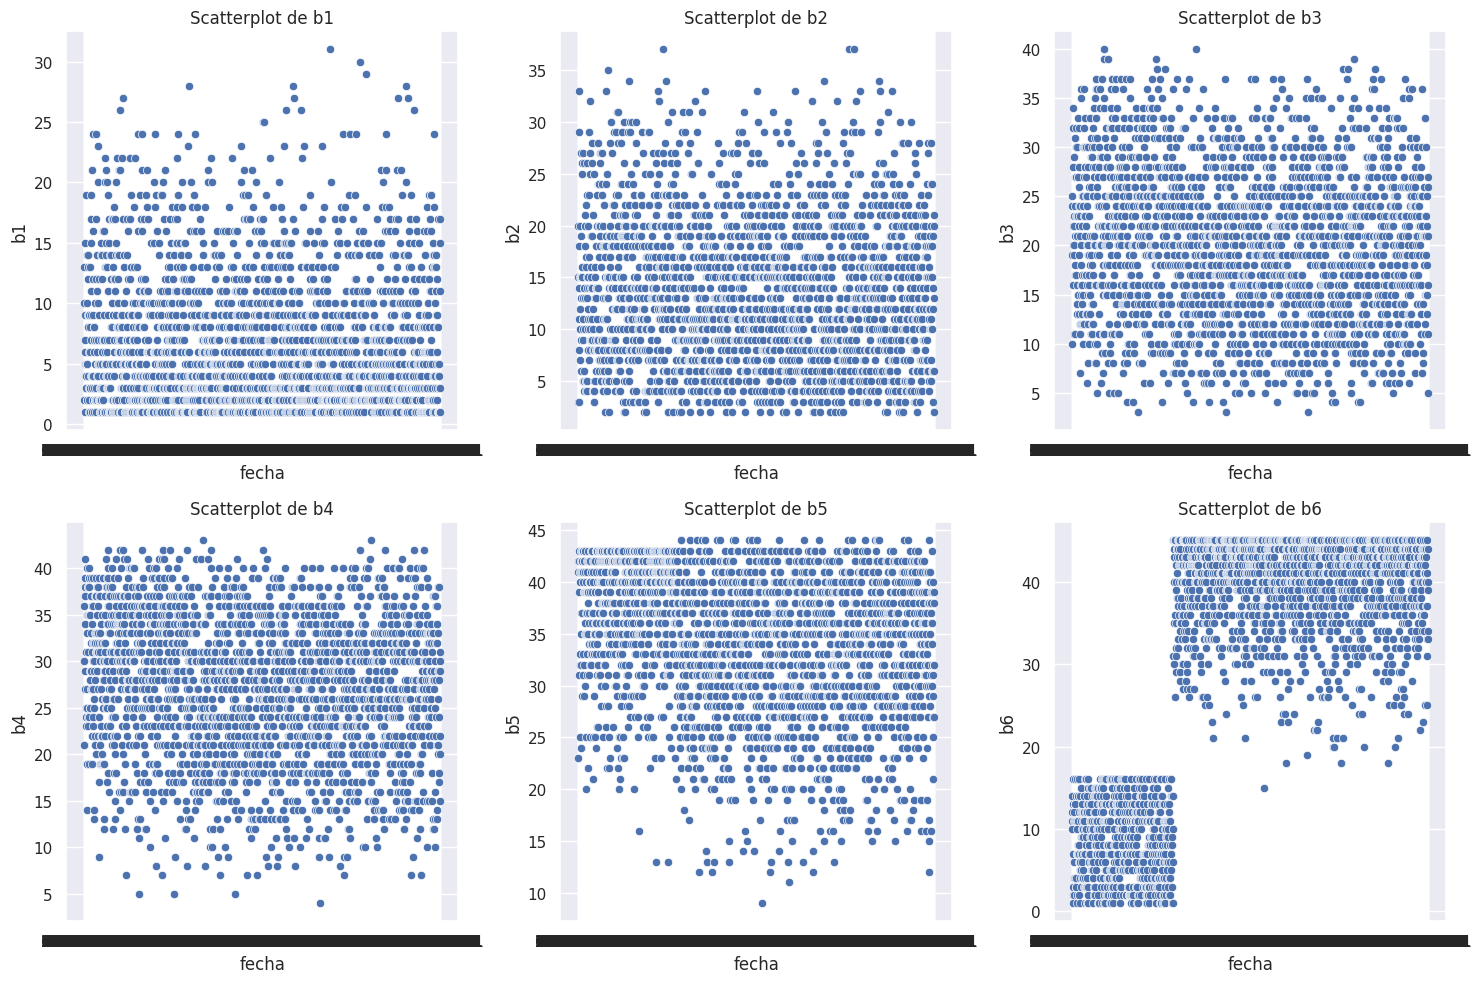

In [46]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

# Lista de columnas para los scatterplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los scatterplots
for i, columna in enumerate(columnas):
    # sns.scatterplot(x=df.index, y=df[columna], ax=axes[i]) # Usar índice como eje x
    sns.scatterplot(x=df['fecha'], y=df[columna], ax=axes[i]) #Usar Fecha como eje X

    axes[i].set_title(f'Scatterplot de {columna}')


# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [85]:
y = df['b1']
x = df['fecha']



In [86]:
seriey = pd.Series(y)
y =seriey.to_frame()

In [87]:
seriex = pd.Series(x)
x = seriex.to_frame()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo_b1 = LinearRegression()


In [89]:
# Ajustar el modelo
modelo_b1.fit(X_train, y_train)

ValueError: could not convert string to float: '22.12.2012'

In [32]:
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_b1))
print("Coeficiente de determinación: ", r2_score(y_test, y_pred_b1))

NameError: name 'y_pred_b1' is not defined

In [31]:

print("Coeficientes del modelo: ", modelo_b1.coef_)
print("Intercepto del modelo: ", modelo_b1.intercept_)
print("R^2 del modelo: ", modelo_b1.score(X_test, y_test))


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [15]:
y_pred_b1 = modelo_b1.predict(X_test)

print("Coeficientes del modelo: ", modelo_b1.coef_)
print("Intercepto del modelo: ", modelo_b1.intercept_)
print("R^2 del modelo: ", modelo_b1.score(X_test, y_test))
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_b1))
print("Coeficiente de determinación: ", r2_score(y_test, y_pred_b1))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.